Link: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/?utm_source=courses&utm_medium=get_started_with_sklearn

# Guide to 12 Dimensionality Reduction Techniques with Python Codes

By using dimensionality reduction techniques we can reduce the number of features in dataset without losing much information and keep improving the model's performance. It's very powerful way to deal with huge datasets.

Using dimensionality reduction techniques, of course. You can use this concept to reduce the number of features in your dataset without having to lose much information and keep (or improve) the model’s performance. It’s a really powerful way to deal with huge datasets, as you’ll see in this article.

This is a comprehensive guide to various dimensionality reduction techniques that can be used in practical scenarios. We will first understand what this concept is and why we should use it, before diving into the 12 different techniques I have covered. Each technique has it’s own implementation in Python to get you well acquainted with it.

### Table of Contents
1. What is Dimensionality Reduction?  
2. Why is Dimensionality Reduction required?  
3. Common Dimensionality Reduction Techniques  
    3.1 Missing Value Ratio  
    3.2 Low Variance Filter  
    3.3 High Correlation Filter  
    3.4 Random Forest  
    3.5 Backward Feature Elimination  
    3.6 Forward Feature Selection  
    3.7 Factor Analysis  
    3.8 Principal Component Analysis  
    3.9 Independent Component Analysis  
    3.10 Methods Based on Projections  
    3.11 t-Distributed Stochastic Neighbor Embedding (t-SNE)  
    3.12 UMAP  
4. Applications of Various Dimensionality Reduction Techniques

## 1. What is Dimensionality Reduction?

We are generating a tremendous amount of data daily. In fact, 90% of the data in the world has been generated in the last 3-4 years! The numbers are truly mind boggling. Below are just some of the examples of the kind of data being collected:

Facebook collects data of what you like, share, post, places you visit, restaurants you like, etc.
Your smartphone apps collect a lot of personal information about you
Amazon collects data of what you buy, view, click, etc. on their site
Casinos keep a track of every move each customer makes
As data generation and collection keeps increasing, visualizing it and drawing inferences becomes more and more challenging. One of the most common ways of doing visualization is through charts. Suppose we have 2 variables, Age and Height. We can use a scatter or line plot between Age and Height and visualize their relationship easily:

Now consider a case in which we have, say 100 variables (p=100). In this case, we can have 100(100-1)/2 = 5000 different plots. It does not make much sense to visualize each of them separately, right? In such cases where we have a large number of variables, it is better to select a subset of these variables (p<<100) which captures as much information as the original set of variables.

Here we have weights of similar objects in Kg (X1) and Pound (X2). If we use both of these variables, they will convey similar information. So, it would make sense to use only one variable. We can convert the data from 2D (X1 and X2) to 1D (Y1) as shown below:

# 2. Why is Dimensionality Reduction required?
Here are some of the benefits of applying dimensionality reduction to a dataset:

Space required to store the data is reduced as the number of dimensions comes down
Less dimensions lead to less computation/training time
Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

# 3. Common Dimensionality Reduction Techniques
Dimensionality reduction can be done in two different ways:

By only keeping the most relevant variables from the original dataset (this technique is called feature selection)
By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)
We will now look at various dimensionality reduction techniques and how to implement each of them in Python.

 

## 3.1 Missing Value Ratio
Suppose you’re given a dataset. What would be your first step? You would naturally want to explore the data first before building model. While exploring the data, you find that your dataset has some missing values. Now what? You will try to find out the reason for these missing values and then impute them or drop the variables entirely which have missing values (using appropriate methods).

What if we have too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.

In [3]:
# Importing required Libraries in Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading the dataset in to Python

train = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\Dimensionality Reduction Techniques\\Train.csv")

In [5]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
# Checking the percentage of missing values in each variable

train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

As we can see above there are too many missing values in 2 variables. We can impute the values using appropriate methods, or we can set a threshold of, say 20% and remove the variable having more than 20% missing values.

In [8]:
# Saving missing values in  a variable

a = train.isnull().sum()/len(train)*100

# Saving column names in a variable

variables = train.columns
variable = []

for i in range(0, 12):
    if a[i]<=20:         # Setting the threshold as 20%
        variable.append(variables[i])

Now the variables to be used are stored in "variable", which contains only those features where the missing values are less than 20%.

# 3.2 Low Variance Filter

Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

Let’s first impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations. For the Outlet_Size column, we will use the mode of the known Outlet_Size values to impute the missing values:

In [9]:
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [10]:
# Lets check whether all the missing values been filled or not.

train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [11]:
# Lets calculate the variance of all the numerical variables.

train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

Above output shows that the variance in Item_Visibility is very less compared to the other variables. We can safely drop this column. This is how we apply low variance filter.

In [12]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0, len(var)):
    if var[i] >= 10:   #setting the threshold as 10%
       variable.append(numeric[i])

# 3.3 High Correlation filter
High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

Let’s perform the correlation calculation in Python. We will drop the dependent variable (Item_Outlet_Sales) first and save the remaining variables in a new dataframe (df).

In [13]:
df = train.drop('Item_Outlet_Sales', 1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


Luckily we do not have any variable with high correlation in our dataset. If the correlation between a pair of variables is greater than 0.50 - 0.60, we should seriously consider dropping one of those variables.

# 3.4 Random Forest
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.

In [14]:
from sklearn.ensemble import RandomForestRegressor

df = df.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

model = RandomForestRegressor(random_state=1, max_depth=10)

df = pd.get_dummies(df)

model.fit(df, train.Item_Outlet_Sales)

RandomForestRegressor(max_depth=10, random_state=1)

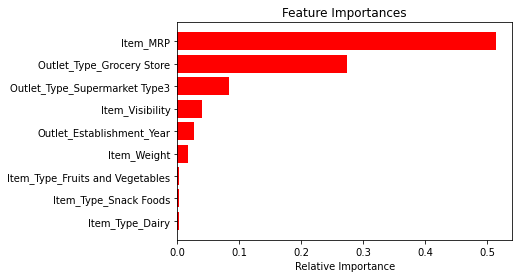

In [15]:
# Plot the Feature importance graph.

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:] # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
from sklearn.feature_selection import SelectFromModel

feature = SelectFromModel(model)

Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

# 3.5 Backward Feature Elimination
Follow the below steps to understand and use the ‘Backward Feature Elimination’ technique:

We first take all the n variables present in our dataset and train the model using them
We then calculate the performance of the model
Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
Repeat this process until no variable can be dropped
This method can be used when building Linear Regression or Logistic Regression models. Let’s look at it’s Python implementation:

In [18]:
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from sklearn import datasets

lreg = LinearRegression()

rfe = RFE(lreg, 10)

# 3.6 Forward Feature Selection

This is the opposite process of the Backward Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

a. We start with a single feature. Essentially, we train the model n number of times using each feature separetly   
b. The variable giving the best performance is selected as the starting variable   
c. Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained   
d. We repeat this process until no significant improvement is seen in the model’s performance   

In [19]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df, train.Item_Outlet_Sales)

This returns an array containing the F-values of the variables and the p-values corresponding to each F value. We will select the variables having F-value greater than 10:

In [20]:
variable = []
for i in range(0, len(df.columns)-1):
    if ffs[0][i] >= 10:
        variable.append(df.columns[i])